# Using Gradient-Descent Algo:

In [22]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# Load the classification data
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [73]:
# Separate the features and label
m = len(df)
x_train = np.array(df[['age']]).reshape(m,1)
y_train = np.array(df['bought_insurance']).reshape(m,1)
x_train.shape , y_train.shape

((27, 1), (27, 1))

## Using Gradient Descent to find parameters 

In [30]:
def initialize_para(): #--> Initailizing Para
    return np.zeros(1)
def sigmoid(z):
    return (1 / (1 + e**(-z))) #--> Sigmoid Function
def hx(x , para):
    return sigmoid(np.dot(x , para)) #--> returns Hypothesis
def cost_function(x , y , para): #--> Cost_Function of Logistic_Reg
    h = hx(x , para)
    m = len(x)
    j = -sum((y * np.log(h)) + ((1-y) * np.log(1-h))) / m
    return j
def para_updating(x , y , para , lr): #--> Update para simultaneously
    m = len(x)
    h = hx(x , para)
    para -= lr * np.dot(x.T , (h-y)) / m #--> updating parameters
    return para

In [64]:
def Logistic_Reg(x , y , para, iterations , lr): #--> Main_Function of Model
    jall = []
    m = len(x)
    h = hx(x , para)
    for i in range(0,iterations):
        para = para_updating(x , y , para , lr)
        j = cost_function(x , y ,para) #--> Finding cost for each iteration and para
        jall.append(j) #--> storing into one list 
    return para , jall   
    
para = initialize_para() #--> Initialising Parameter to zero
para = para.reshape(1,1)
para , jall = Logistic_Reg(x_train , y_train , para , 1000 , 0.003)

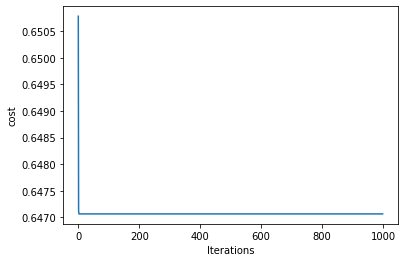

In [65]:
plt.plot(range(0,1000) , jall)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()

In [66]:
predict = hx(x_train , para) #--> predicting values by hypothesis 
predict = [1 if i > 0.6 else 0 for i in predict] # --> whose chances of insurance bought > 60% assume that he will buy  
temp = {}
temp['actual'] = [i for i in y_train]
temp['predicted'] = [i for i in predict]
df['predict'] = [i for i in predict]

In [67]:
result = pd.DataFrame(temp)
df.rename(columns = {'bought_insurance' : 'actual'} , inplace = True)
df

,age,actual,predict
0,22,0,0
1,25,0,0
2,47,1,1
3,52,0,1
4,46,1,1
5,56,1,1
6,55,0,1
7,60,1,1
8,62,1,1
9,61,1,1


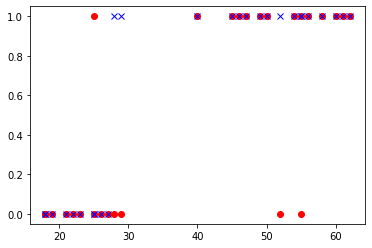

In [68]:
plt.plot(x_train , y_train , 'ro')
plt.plot(x_train , predict , 'bx')
plt.show()